# Program 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

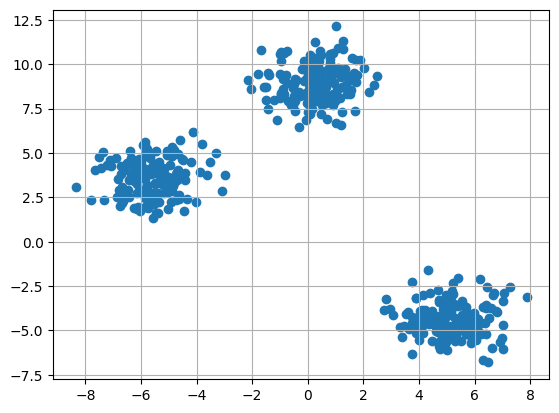

In [ ]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
k = 3
clusters = {}
np.random.seed(23)
for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    clusters[idx] = cluster
clusters


{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

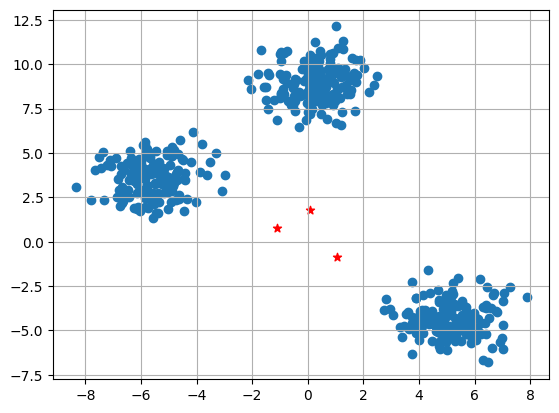

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


In [ ]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [ ]:
#Implementing E step
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

In [ ]:
#Implementing the M-Step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters


In [ ]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

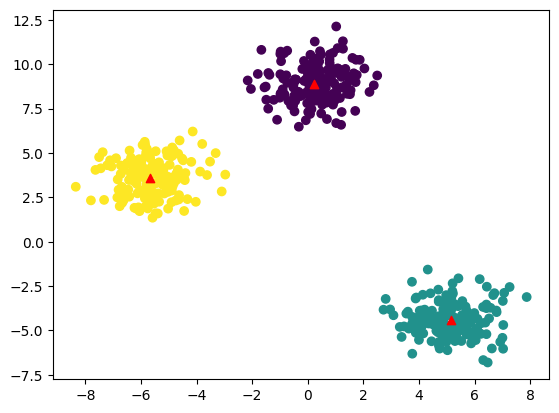

In [ ]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)
#step 9
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

##Program 2

In [ ]:
import pandas as pd
df=pd.read_csv('/content/income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [ ]:
df.tail()

,Name,Age,Income($)
17,Priyanka,41,63000
18,Nick,43,64000
19,Alia,39,80000
20,Sid,41,82000
21,Abdul,39,58000


In [ ]:
age=df["Age"]
income=df["Income($)"]

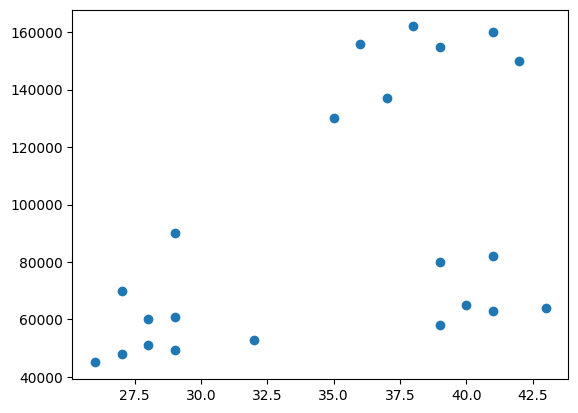

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(age,income)

In [ ]:
from sklearn.cluster import KMeans
sse = []
k_range = range(1, len(df))
for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df[['Age', 'Income($)']])
    sse.append(model.inertia_)

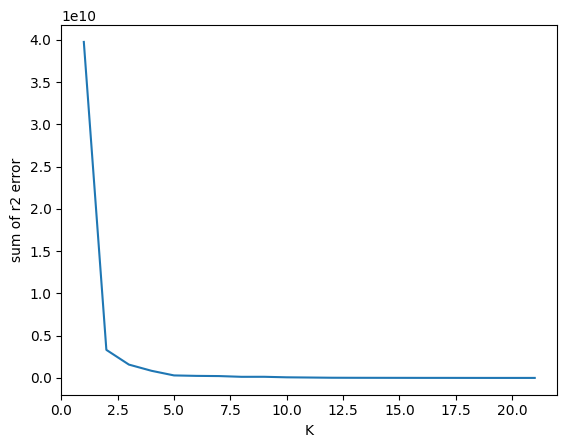

In [ ]:
from matplotlib import pyplot as plt
plt.xlabel("K")
plt.ylabel("sum of r2 error")
plt.plot(k_range,sse)

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)

In [ ]:
y_predict=km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predict
df.head()
km.cluster_centers_

array([[3.63333333e+01, 8.40000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04]])

In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

<ipython-input-20-36a88ce566ee>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


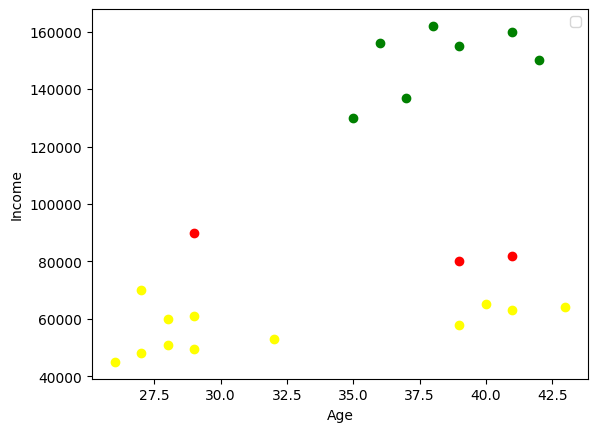

In [ ]:
plt.scatter(df1["Age"],df1["Income($)"],color="Red")
plt.scatter(df2["Age"],df2["Income($)"],color="Green")
plt.scatter(df3["Age"],df3["Income($)"],color="Yellow")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sca=MinMaxScaler()
sca.fit(df[['Income($)']])
df["Income($)"]=sca.transform(df[["Income($)"]])
sca.fit(df[["Age"]])
df["Age"]=sca.transform(df[["Age"]])

In [ ]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predict
df.head()
centroids=km.cluster_centers_
centroids

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

<ipython-input-23-559b691c71e5>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


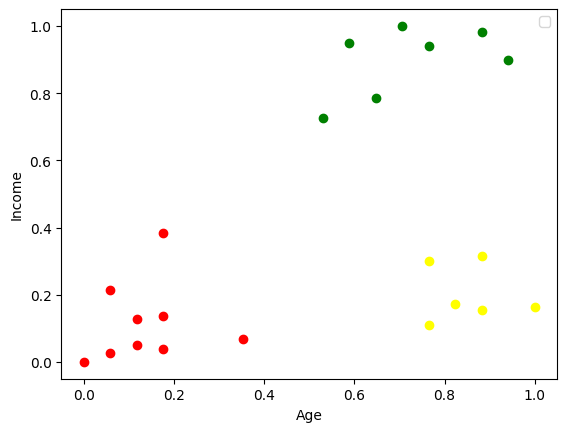

In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1["Age"],df1["Income($)"],color="Red")
plt.scatter(df2["Age"],df2["Income($)"],color="Green")
plt.scatter(df3["Age"],df3["Income($)"],color="Yellow")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

<ipython-input-24-f45b30cc9e80>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


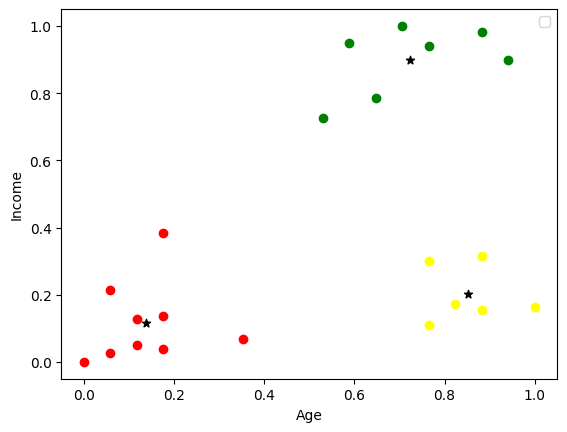

In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1["Age"],df1["Income($)"],color="Red")
plt.scatter(df2["Age"],df2["Income($)"],color="Green")
plt.scatter(df3["Age"],df3["Income($)"],color="Yellow")
plt.scatter(centroids[:,0],centroids[:,1],color="Black",marker="*")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()